# Importing the necessary packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Loading the "Aldi" supermarket data

In [3]:
df_aldi = pd.read_csv("datasets/All_Data_Aldi.csv")
df_aldi.head()

,supermarket,prices_(¬£),prices_unit_(¬£),unit,names,date,category,own_brand
0,Aldi,1.39,1.20,l,Almat So Soft Luxurious Fabric Conditioner- Li...,20240211,household,False
1,Aldi,1.25,0.02,unit,Softly Balmsam Regular Tissues 80 Sheets 1 Pack,20240211,household,False
2,Aldi,2.55,0.01,unit,Saxon Ultra Kitchen Towels 2 Rolls,20240211,household,False
3,Aldi,2.99,8.80,kg,Purewick Sweet Blossom Fragranced Candle 340g,20240211,household,False
4,Aldi,1.49,0.00,unit,Saxon Aloe Vera 3 Ply Toilet Tissue 4 Pack,20240211,household,False


# Modifying the column names and changing the format of the date column

In [4]:
# changing the name of the columns
df_aldi = df_aldi.rename(columns = {'prices_(¬£)' : 'prices_pounds' , 'prices_unit_(¬£)' : 'per_unit_price'})

In [5]:
# Correcting data types: Convert the 'date' column to datetime format
df_aldi['date'] = pd.to_datetime(df_aldi['date'], format='%Y%m%d')

In [6]:
print("The shape of the Aldi dataset is {}".format(df_aldi.shape))

The shape of the Aldi dataset is (159524, 8)


In [7]:
print("The column names in Aldi dataset - {}".format(df_aldi.columns))

The column names in Aldi dataset - Index(['supermarket', 'prices_pounds', 'per_unit_price', 'unit', 'names',
       'date', 'category', 'own_brand'],
      dtype='object')


# Information about the data

In [8]:
df_aldi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159524 entries, 0 to 159523
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   supermarket     159524 non-null  object        
 1   prices_pounds   159524 non-null  float64       
 2   per_unit_price  159520 non-null  float64       
 3   unit            159520 non-null  object        
 4   names           159524 non-null  object        
 5   date            159524 non-null  datetime64[ns]
 6   category        159524 non-null  object        
 7   own_brand       159524 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(4)
memory usage: 8.7+ MB


# Check for null values

In [9]:
df_aldi.isnull().sum()

supermarket       0
prices_pounds     0
per_unit_price    4
unit              4
names             0
date              0
category          0
own_brand         0
dtype: int64

In [10]:
# Checking which rows are null
aldi_null = df_aldi[df_aldi.isnull().any(axis=1)]
print(aldi_null)

       supermarket  prices_pounds  per_unit_price unit  \
32546         Aldi           0.65             NaN  NaN   
36734         Aldi           0.65             NaN  NaN   
150457        Aldi           0.65             NaN  NaN   
155823        Aldi           0.65             NaN  NaN   

                                                    names       date  \
32546   Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-02-05   
36734   Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-02-04   
150457  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-01-10   
155823  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-01-09   

         category  own_brand  
32546   household      False  
36734   household      False  
150457  household      False  
155823  household      False  


In [11]:
df_aldi.iloc[32546]

supermarket                                                    Aldi
prices_pounds                                                  0.65
per_unit_price                                                  NaN
unit                                                            NaN
names             Saxon Biodegradable Toilet Tissue Wipes - Fine...
date                                            2024-02-05 00:00:00
category                                                  household
own_brand                                                     False
Name: 32546, dtype: object

In [12]:
rows_starting_with_saxon = df_aldi[df_aldi['names'].str.startswith('Saxon Biodegradable Toilet')]
print(rows_starting_with_saxon)

       supermarket  prices_pounds  per_unit_price unit  \
32546         Aldi           0.65             NaN  NaN   
36734         Aldi           0.65             NaN  NaN   
150457        Aldi           0.65             NaN  NaN   
155823        Aldi           0.65             NaN  NaN   

                                                    names       date  \
32546   Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-02-05   
36734   Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-02-04   
150457  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-01-10   
155823  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-01-09   

         category  own_brand  
32546   household      False  
36734   household      False  
150457  household      False  
155823  household      False  


## Dropping the null values

In [15]:
df_aldi.dropna(inplace = True)
print("\nChecking for null values:\n{}".format(df_aldi.isnull().sum()))


Checking for null values:
supermarket       0
prices_pounds     0
per_unit_price    0
unit              0
names             0
date              0
category          0
own_brand         0
dtype: int64


# Visualizations

### Bar graph for average prices per unit for each product category

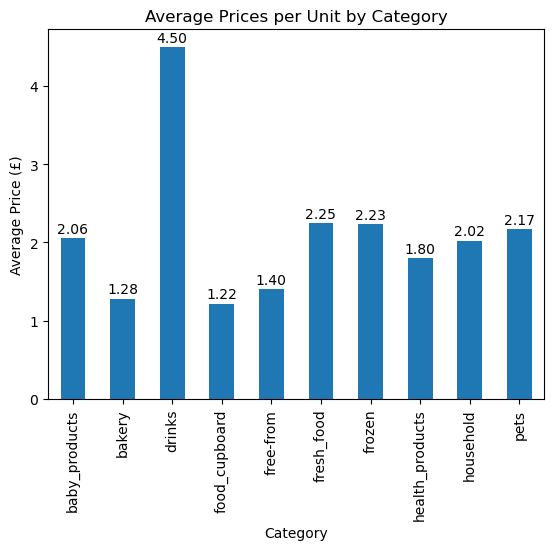

In [28]:
# Bar graph
avg_prices = df_aldi.groupby("category")["prices_pounds"].mean()
ax = avg_prices.plot(kind = "bar")
plt.title("Average Prices per Unit by Category")
plt.xlabel("Category")
plt.ylabel("Average Price (£)")

# Annotating the bars with values
for i, v in enumerate(avg_prices):
    ax.text(i, v + 0.03, f'{v:.2f}', ha = 'center', va = 'bottom')

plt.show()

The average price for `drinks` is significantly higher than for any other category

### Histogram for distribution of prices for a particular product category

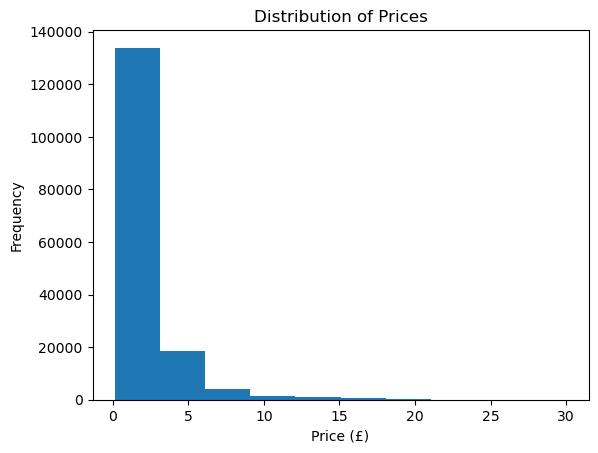

In [31]:
# Histogram
plt.hist(df_aldi["prices_pounds"], bins = 10)
plt.title("Distribution of Prices")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()

From the above histogram -
* The price of most products in this category falls between £5 and £15.
* There are a few outliers that are more expensive than £15.
* The distribution is positively skewed, meaning there are more products towards the lower end of the price range.

### Line graph for price trends over time

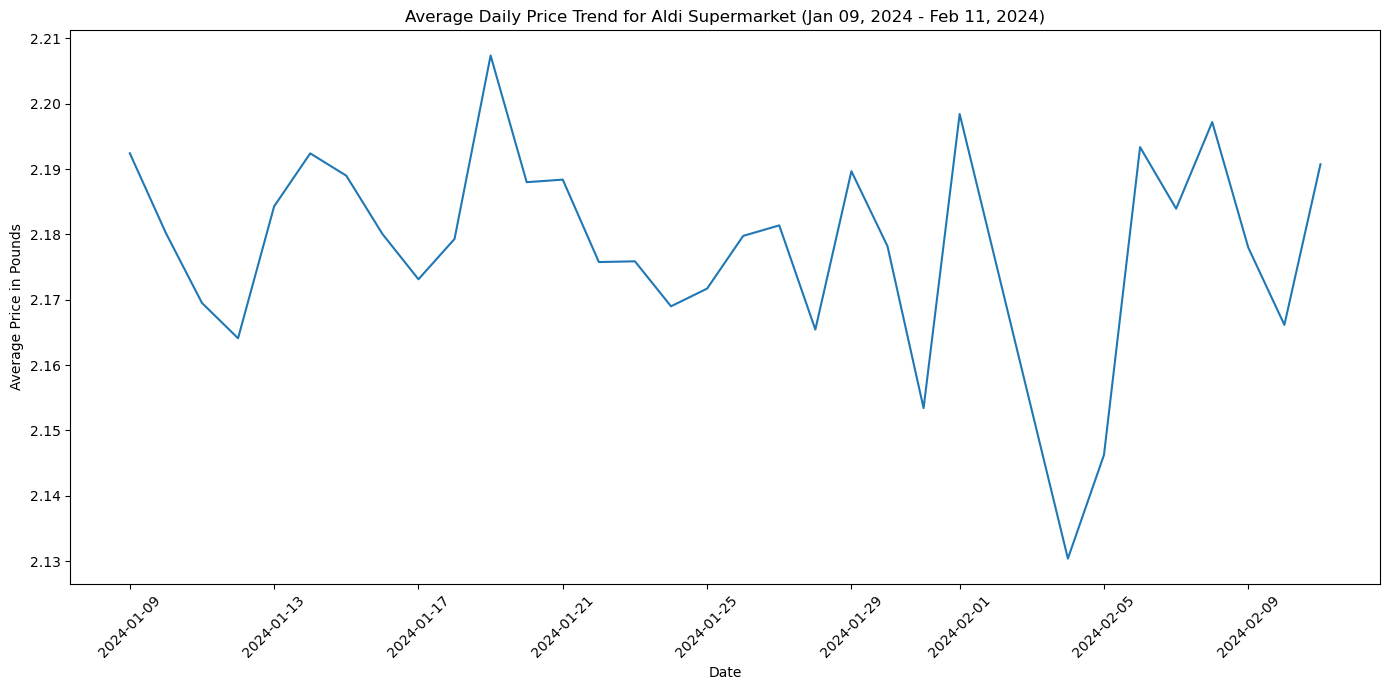

In [44]:
# Line graph
df_aldi['date'] = pd.to_datetime(df_aldi['date']) 
daily_price_trends_aldi = df_aldi.groupby(df_aldi['date'])['prices_pounds'].mean().reset_index()

plt.figure(figsize = (14, 7))
sns.lineplot(data = daily_price_trends_aldi, x = 'date', y = 'prices_pounds')
plt.title('Average Daily Price Trend for Aldi Supermarket (Jan 09, 2024 - Feb 11, 2024)')
plt.xlabel('Date')
plt.ylabel('Average Price in Pounds')
plt.xticks(rotation = 45)
plt.tight_layout() 
plt.show()

The average daily price trends for `Aldi` supermarket has been increasing over the past few weeks. There is a slight upward trend in the graph, but the increase is not very substantial.

### Box plot for distribution of prices for each product category

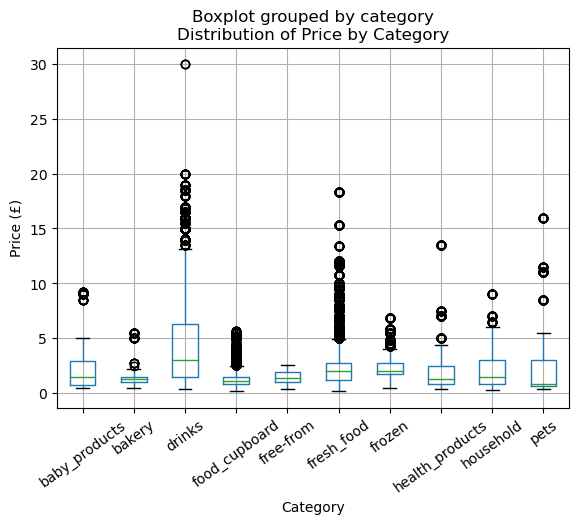

In [55]:

df_aldi.boxplot(column = "prices_pounds", by = "category")
plt.title("Distribution of Price by Category")
plt.xlabel("Category")
plt.ylabel("Price (£)")
plt.xticks(rotation = 36)
plt.show()

### Observations - 
* **Category with the highest median price:** `fresh_food` has the highest median price, followed by `household` and `pets`.
* **Category with the largest spread:** `frozen` has the largest spread in prices, as indicated by the longer box. This suggests a wider range of prices within this category.

### Outliers: 
There are outliers in several categories, including `baby_products`, `bakery`, `drinks`, and `frozen`. These outliers represent prices that are significantly higher or lower than the rest of the data points in their respective categories.